In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
raw_data = pd.read_csv('D:\\Sample Programing\\kaggle\\input\\ashrae-global-thermal-comfort-database-ii/ashrae_db2.01.csv')
data = raw_data.copy()
drop_col = ['Climate','Publication (Citation)','Data contributor','Operative temperature (F)','Radiant temperature (F)','Globe temperature (F)','Outdoor monthly air temperature (F)','Velocity_l (fpm)','Velocity_m (fpm)','Velocity_h (fpm)','Tg_l (F)','Tg_m (F)','Tg_h (F)','Ta_l (F)','Ta_m (F)','Ta_h (F)','Air temperature (F)','Air velocity (fpm)']
data = data.drop(drop_col,axis=1)
data.head()

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Season,Koppen climate classification,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,Age,...,Velocity_l (m/s),Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Database
0,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
1,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
2,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
3,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,14.0,...,NaN,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
4,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2


<AxesSubplot:>

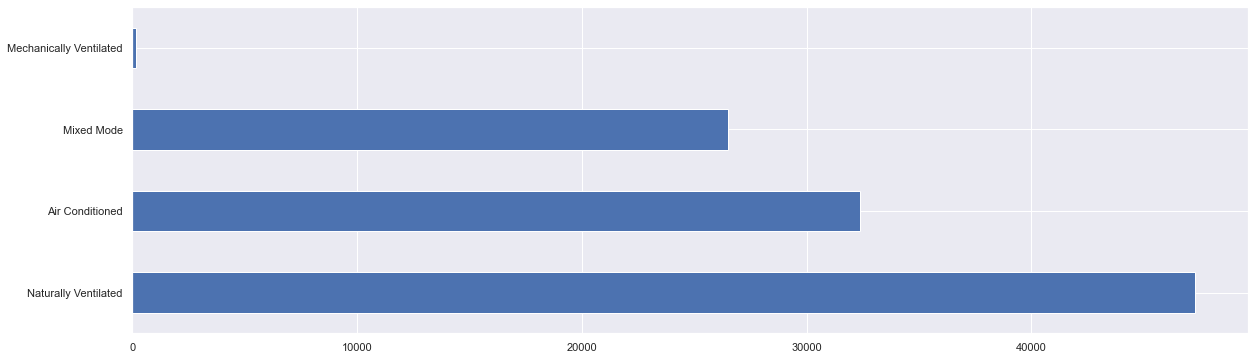

In [3]:
import seaborn as sns
sns.set()
data['Cooling startegy_building level'].value_counts().plot(kind='barh', figsize=(20,6))

<AxesSubplot:>

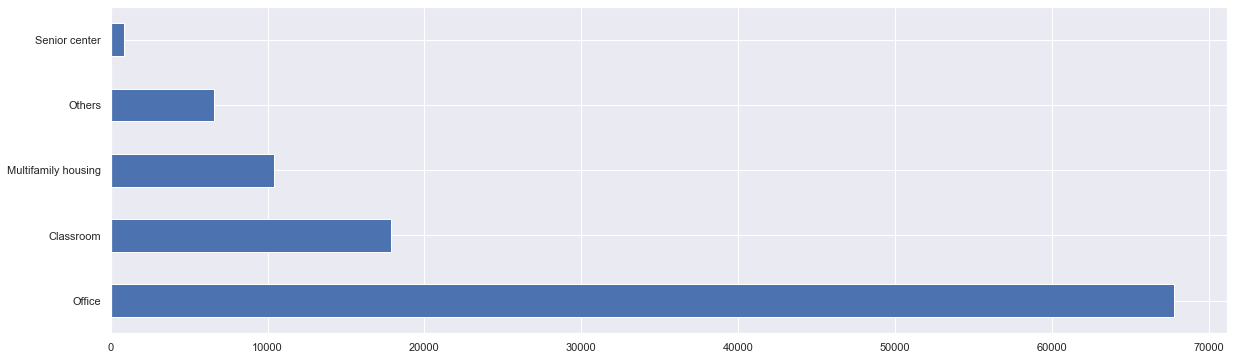

In [4]:
data['Building type'].value_counts().plot(kind='barh', figsize=(20,6))

<AxesSubplot:>

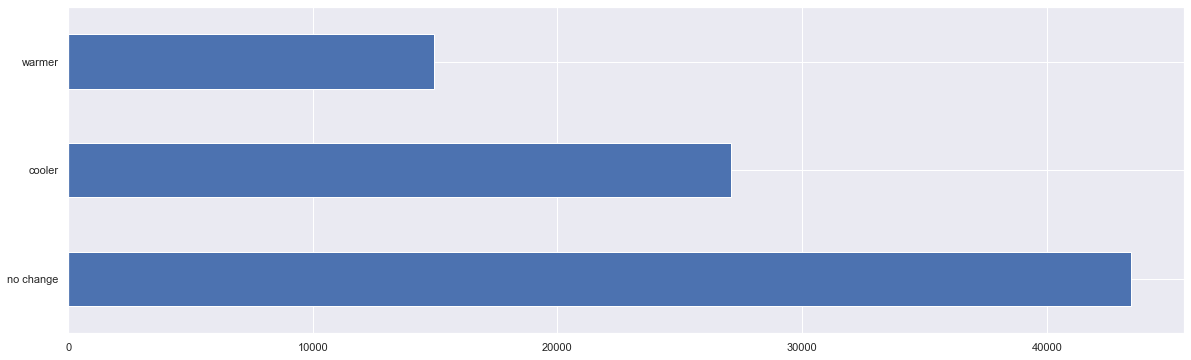

In [5]:
data['Thermal preference'].value_counts().plot(kind='barh', figsize=(20,6))

In [6]:
data = data.rename(columns={'PMV': 'Predicted Mean Vote', 
                            'PPD': 'Predicted Percentage Disastisfied', 
                            'SET':'Standard Effective Temp', 
                            'CLO': 'Clothing Insulation', 
                            'Ta_h (C)': 'tempfloor_high (C)', 
                            'Ta_m (C)':'tempfloor_med (C)', 
                            'Ta_l (C)':'tempfloor_low (C)', 
                            'Tg_h (C)':'globetemp_high (C)', 
                            'Tg_m (C)':'globetemp_med (C)',
                            'Tg_l (C)':'globetemp_low (C)',
                            'velocity_h (m/s)':'velocity_high (m/s)',
                            'velocity_m (m/s)':'velocity_med (m/s)',
                            'velocity_l (m/s)':'velocity_low (m/s)', 
                            'Cooling startegy_building level':'cooling_strategy_building',
                            'Cooling startegy_operation mode for MM buildings':'cooling_strategy_for_mm_buildings'})
data.columns

Index(['Year', 'Season', 'Koppen climate classification', 'City', 'Country',
       'Building type', 'cooling_strategy_building',
       'cooling_strategy_for_mm_buildings', 'Heating strategy_building level',
       'Age', 'Sex', 'Thermal sensation', 'Thermal sensation acceptability',
       'Thermal preference', 'Air movement acceptability',
       'Air movement preference', 'Thermal comfort', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'activity_10', 'activity_20', 'activity_30', 'activity_60',
       'Air temperature (C)', 'tempfloor_high (C)', 'tempfloor_med (C)',
       'tempfloor_low (C)', 'Operative temperature (C)',
       'Radiant temperature (C)', 'Globe temperature (C)',
       'globetemp_high (C)', 'globetemp_med (C)', 'globetemp_low (C)',
       'Relative humidity (%)', 'Humidity preference', 'Humidity sensation',
       'Air velocity (m/s)', 'Velocity_h (m/s)', 'Velocity_m (m/s)',
       'Velocity_l (m

In [7]:
data['Koppen climate classification'].isna().sum()

0

In [8]:
tropical_A = []
dry_B = []
temperate_C = []
continental_D = []
polar_E = []


# Koppen climate classifcation that starts with A always refers to tropical, B refers to dty and so on...
for climate in data['Koppen climate classification'].unique():
    if climate[0] == 'A':
        tropical_A.append(climate)
    elif climate[0] == 'B':
        dry_B.append(climate)
    elif climate[0] == 'C':
        temperate_C.append(climate)
    elif climate[0] == 'D':
        continental_D.append(climate)
    elif climate[0] == 'E':
        polar_E.append(climate)

In [9]:
print(tropical_A)
print(dry_B)
print(temperate_C)
print(continental_D)
print(polar_E)

['Aw', 'Af', 'Am', 'As']
['BSh', 'BWh', 'BSk']
['Cfa', 'Csb', 'Csa', 'Csc', 'Cfb', 'Cwa', 'Cwb']
['Dwa', 'Dfb']
[]


In [10]:
data.loc[data['Koppen climate classification'].isin(tropical_A), 
             'Climate'] = 'Tropical'
data.loc[data['Koppen climate classification'].isin(dry_B), 
             'Climate'] = 'Dry'
data.loc[data['Koppen climate classification'].isin(temperate_C), 
             'Climate'] = 'Temperate'
data.loc[data['Koppen climate classification'].isin(continental_D), 
             'Climate'] = 'Continental'
data.loc[data['Koppen climate classification'].isin(polar_E), 
             'Climate'] = 'Polar'

In [11]:
data.Climate.value_counts()

Temperate      63657
Tropical       18041
Dry            16295
Continental     9590
Name: Climate, dtype: int64

In [12]:
data['Air movement acceptability'] = data['Air movement acceptability'].astype('object')

In [13]:
data['Thermal sensation acceptability'] = data['Thermal sensation acceptability'].astype('object')

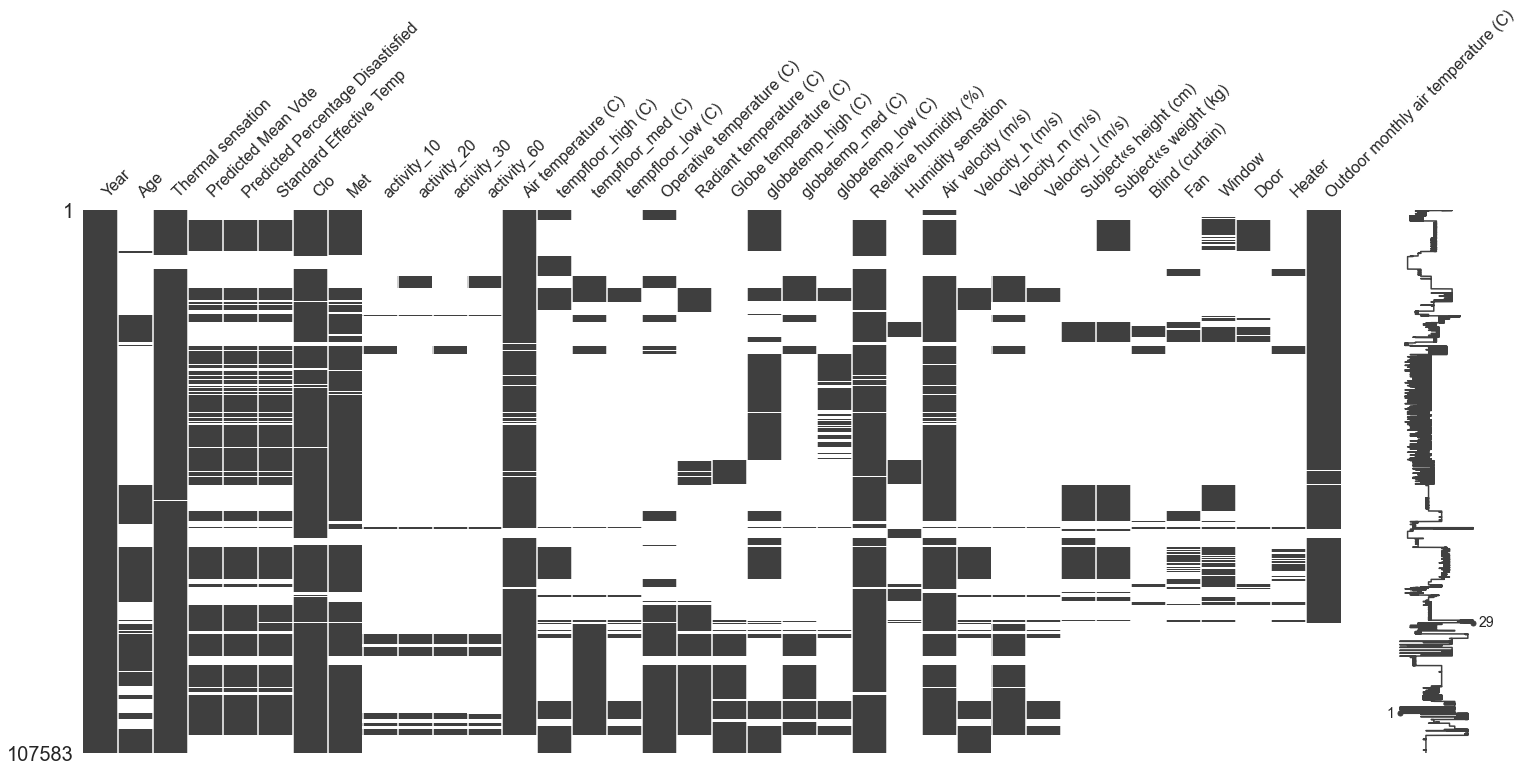

In [14]:
import missingno as msno

msno.matrix(data.select_dtypes(include='number'));

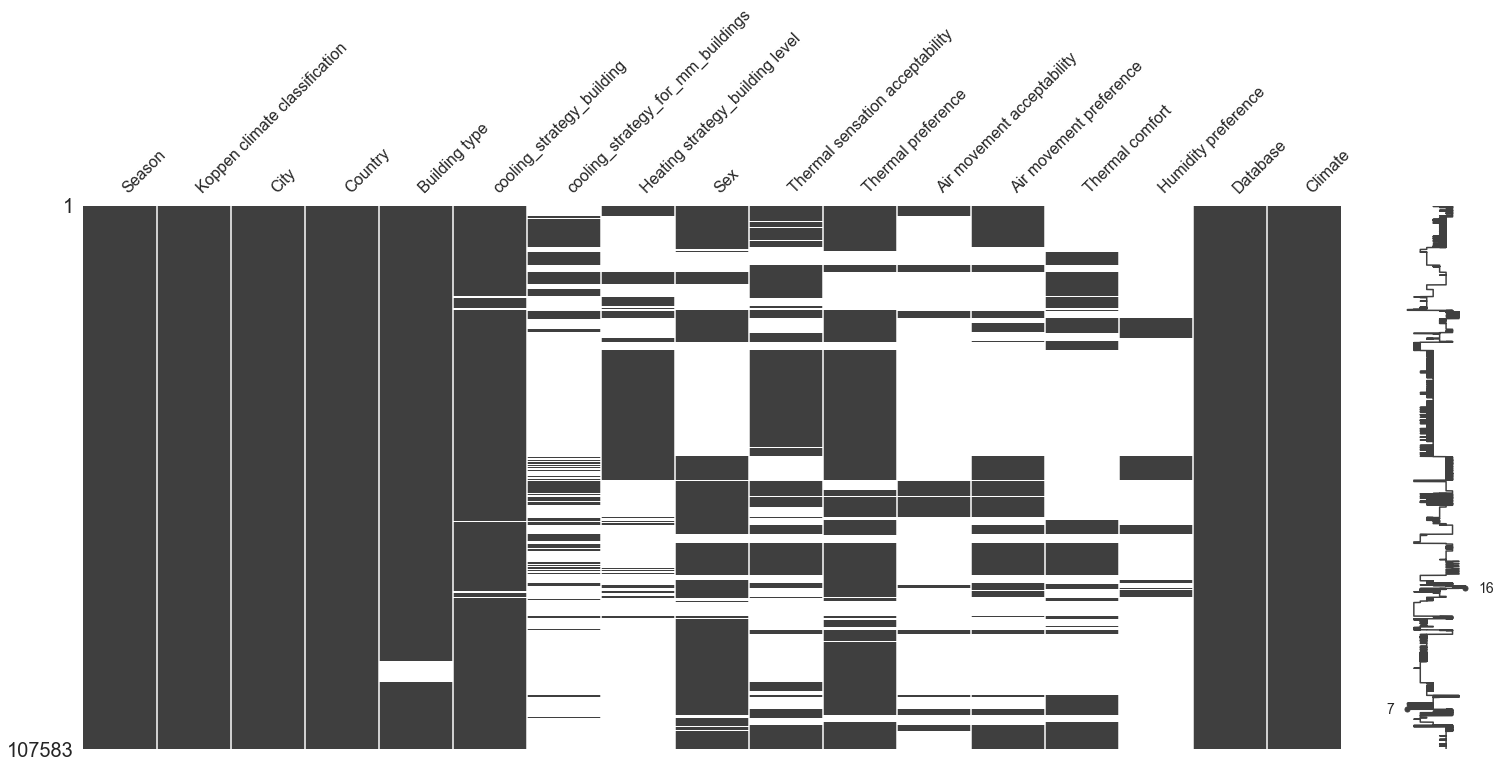

In [15]:
msno.matrix(data.select_dtypes(include='O'));

In [16]:
data.cooling_strategy_building.unique()

array(['Air Conditioned', 'Naturally Ventilated', 'Mixed Mode', nan,
       'Mechanically Ventilated'], dtype=object)

In [17]:
data_mechanical = data[data.cooling_strategy_building == 'Mechanically Ventilated']
data_aircon = data[data.cooling_strategy_building == 'Air Conditioned']
data_natural = data[data.cooling_strategy_building == 'Naturally Ventilated']
data_mm = data[data.cooling_strategy_building == 'Mixed Mode']
data_na = data[data.cooling_strategy_building.isna() == True]

<AxesSubplot:>

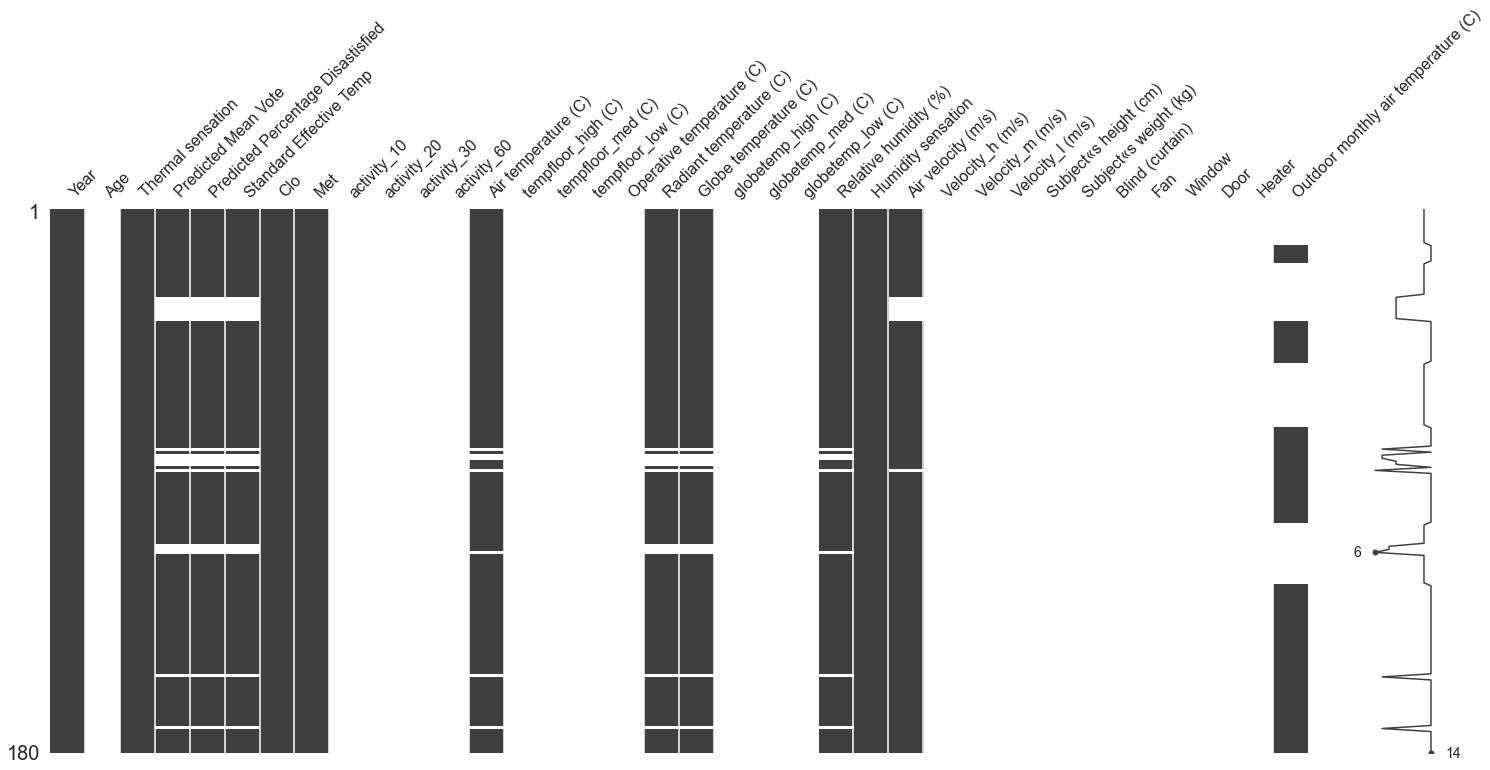

In [18]:
msno.matrix(data_mechanical.select_dtypes(include='number'))

<AxesSubplot:>

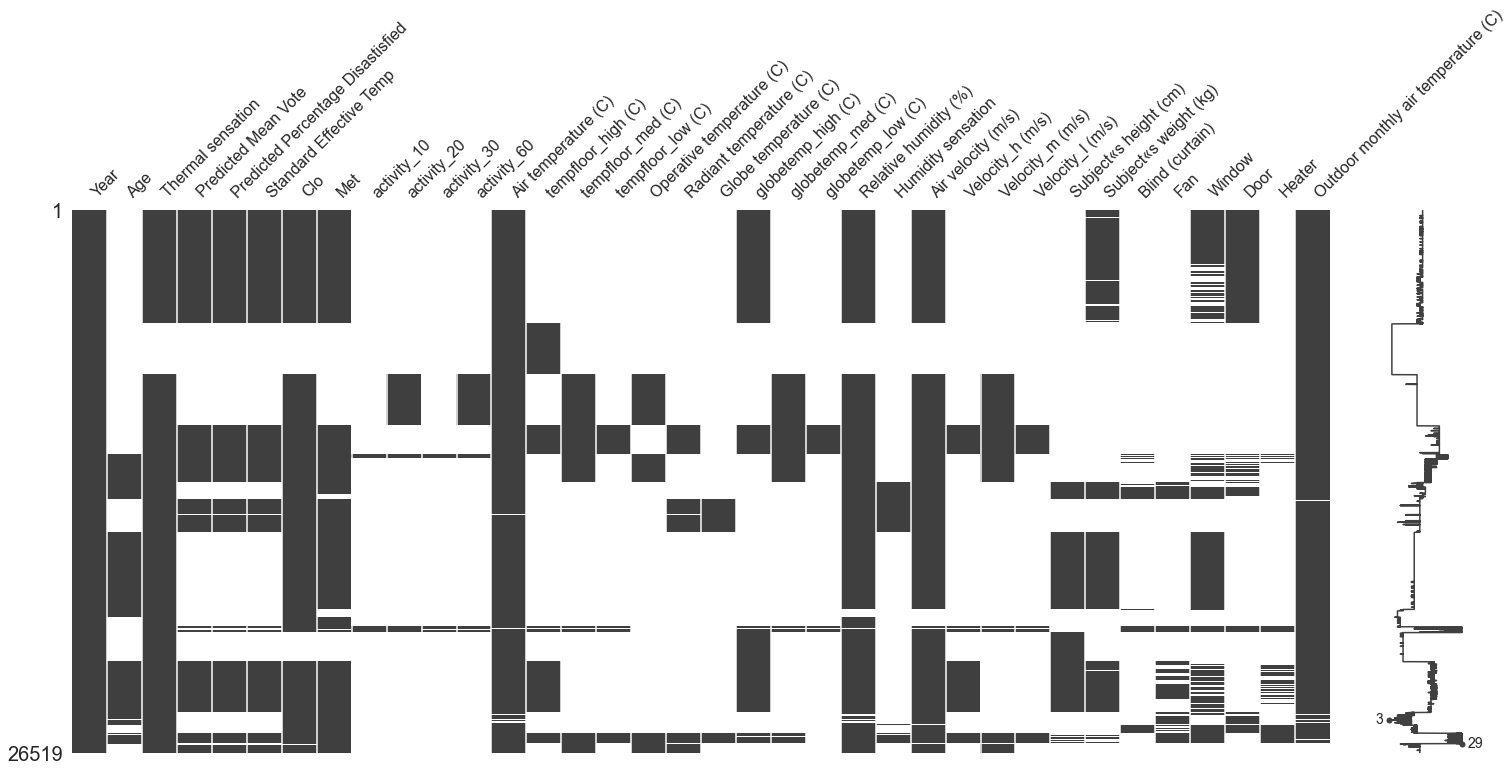

In [19]:
msno.matrix(data_mm.select_dtypes(include='number'))

<AxesSubplot:>

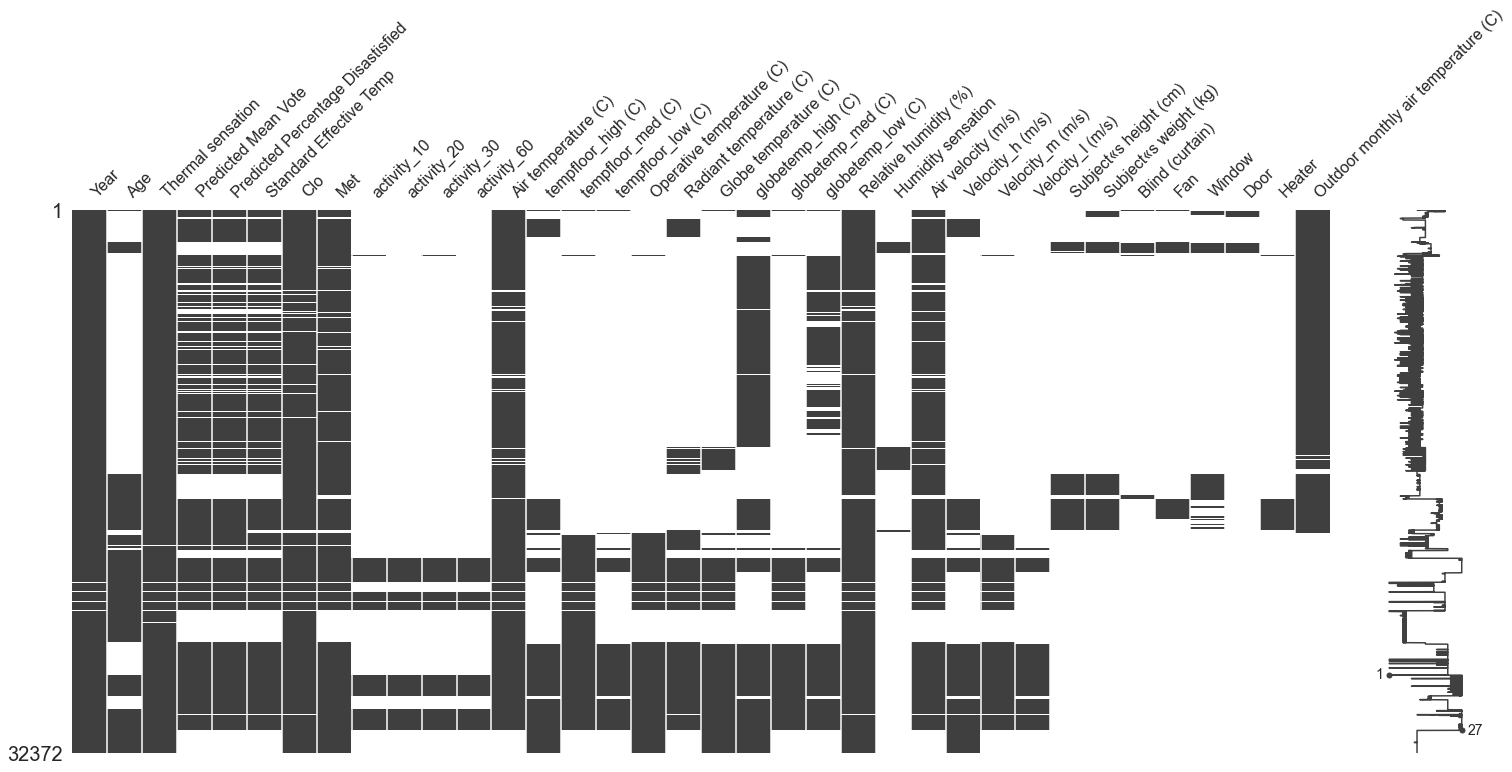

In [20]:
msno.matrix(data_aircon.select_dtypes(include='number'))

<AxesSubplot:>

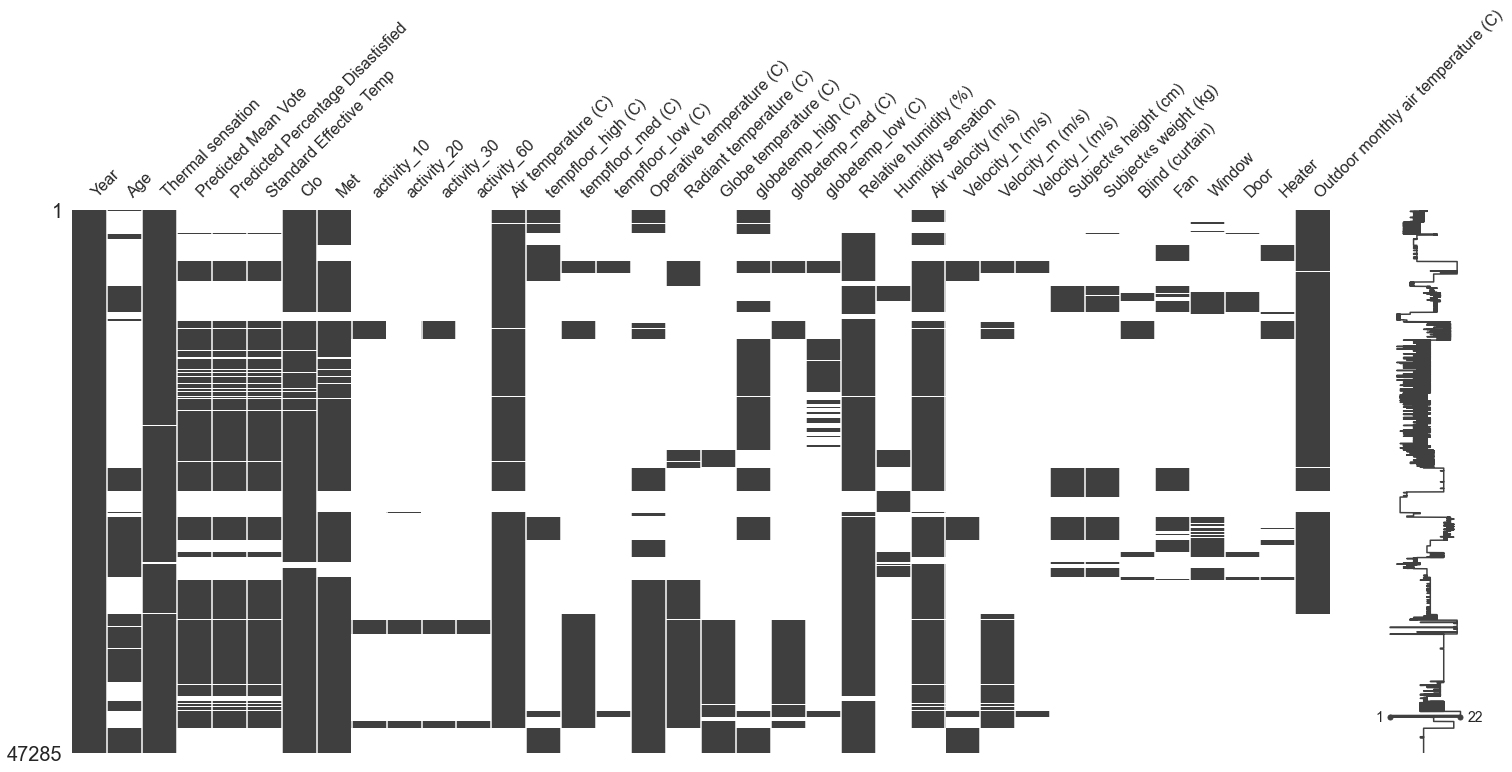

In [21]:
msno.matrix(data_natural.select_dtypes(include='number'))

In [22]:
keep_col = ['Year', 
            'Thermal sensation', 
            'Predicted Mean Vote', 
            'Predicted Percentage Disastisfied', 
            'Standard Effective Temp', 
            'Clo', 
            'Met', 
            'Air temperature (C)', 
            'Relative humidity (%)', 
            'Air velocity (m/s)', 
            'Outdoor monthly air temperature (C)',
            'Season', 
            'Climate', 
            'City', 
            'Country',
            'Building type', 
            'cooling_strategy_building', 
            'Thermal preference', 
            'Thermal sensation acceptability']

In [23]:
# We are going to use this variable
data_no_na = data[keep_col]

In [24]:
data_no_na.select_dtypes(include='number').columns

Index(['Year', 'Thermal sensation', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'Air temperature (C)', 'Relative humidity (%)',
       'Air velocity (m/s)', 'Outdoor monthly air temperature (C)'],
      dtype='object')

In [25]:
data_no_na.select_dtypes(include='O').columns

Index(['Season', 'Climate', 'City', 'Country', 'Building type',
       'cooling_strategy_building', 'Thermal preference',
       'Thermal sensation acceptability'],
      dtype='object')

In [26]:
print('mean: ' + str(data_no_na['Clo'].mean()))
print('median: '+ str(data_no_na['Clo'].median()))

mean: 0.6736686633956435
median: 0.63


In [27]:
data_no_na['Clo'].describe()

count    99663.000000
mean         0.673669
std          0.287622
min          0.000000
25%          0.490000
50%          0.630000
75%          0.780000
max          2.890000
Name: Clo, dtype: float64

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clo', ylabel='Density'>

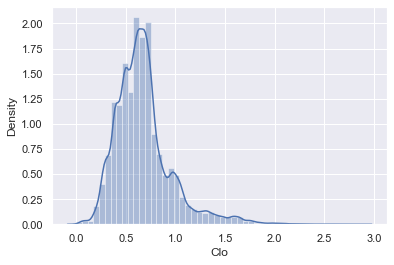

In [28]:
sns.distplot(data_no_na['Clo'])

In [29]:
data_no_na['Clo'] = data_no_na['Clo'].fillna(data_no_na['Clo'].mean())

<ipython-input-29-30319e957696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_na['Clo'] = data_no_na['Clo'].fillna(data_no_na['Clo'].mean())


#### Here, we change CLO because it's not an important variable and the data seems normally distributed

In [30]:
print('mean: ' + str(data_no_na['Met'].mean()))
print('median: '+ str(data_no_na['Met'].median()))

mean: 1.2066263727756334
median: 1.2


In [31]:
data_no_na['Met'].describe()

count    90419.000000
mean         1.206626
std          0.248939
min          0.650000
25%          1.060000
50%          1.200000
75%          1.200000
max          6.830000
Name: Met, dtype: float64

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Met', ylabel='Density'>

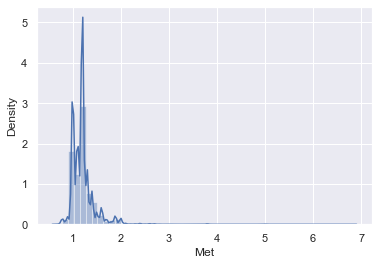

In [32]:
sns.distplot(data_no_na['Met'])

In [33]:
data_no_na['Met'] = data_no_na['Met'].fillna(data_no_na['Met'].median())

<ipython-input-33-19e2a63c78fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_na['Met'] = data_no_na['Met'].fillna(data_no_na['Met'].median())


In [34]:
data_simple = data_no_na.copy()

In [35]:
data_simple = data_simple.dropna()

<AxesSubplot:>

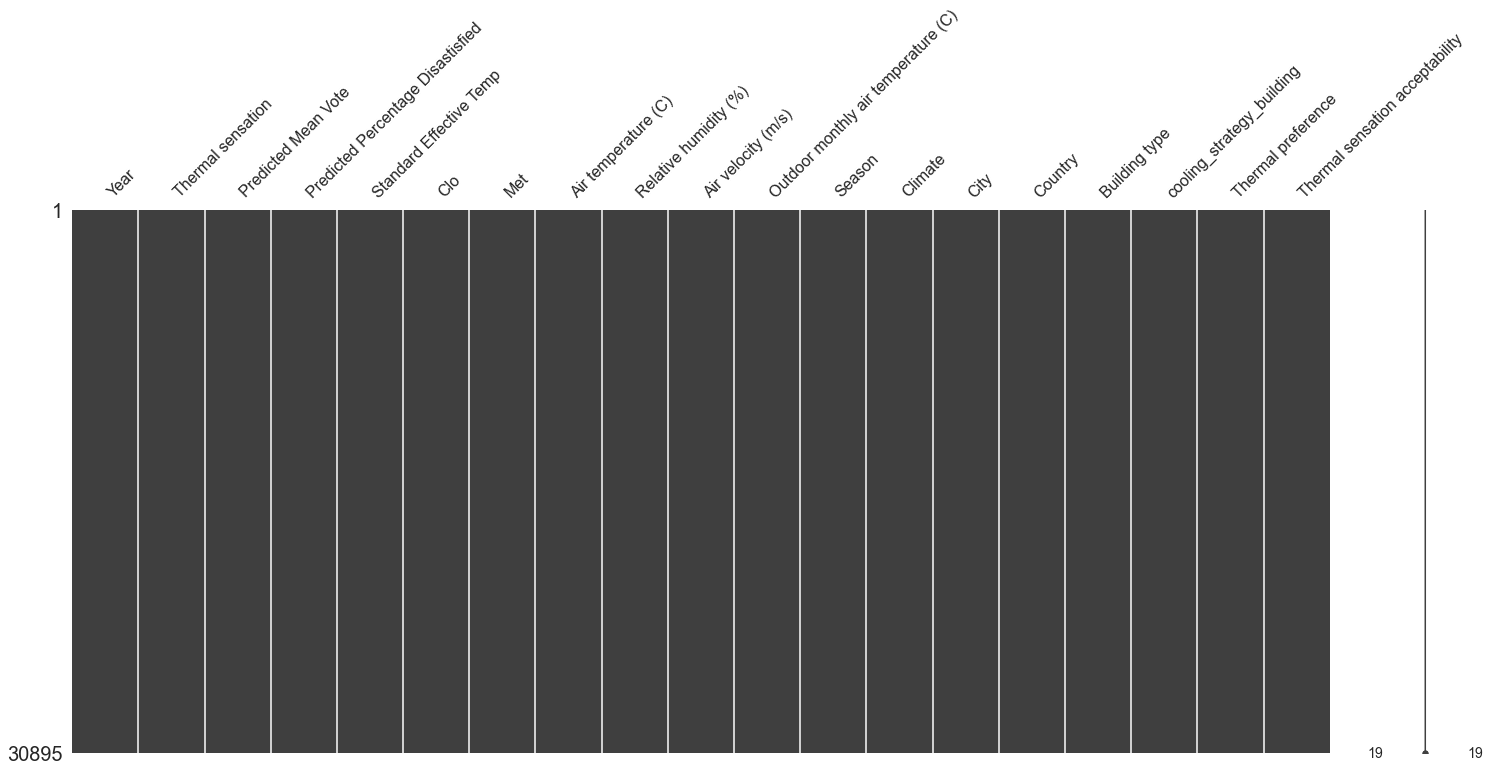

In [36]:
msno.matrix(data_simple)

In [37]:
data_simple.cooling_strategy_building.unique()

array(['Air Conditioned', 'Mixed Mode', 'Naturally Ventilated'],
      dtype=object)

In [38]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [39]:
object_cols = ['Season','Climate','Building type','Thermal sensation acceptability','Thermal preference']

In [40]:
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_simple[object_cols]))
OH_cols.index = data_simple.index
column_name = OH_encoder.get_feature_names(object_cols)
OH_cols.columns = column_name

In [41]:
OH_cols

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Climate_Dry,Climate_Temperate,Climate_Tropical,Building type_Office,Thermal sensation acceptability_0.0,Thermal sensation acceptability_1.0,Thermal preference_cooler,Thermal preference_no change,Thermal preference_warmer
74,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
77,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
78,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73160,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
73161,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73163,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [42]:
data_simple.select_dtypes(include="O").columns

Index(['Season', 'Climate', 'City', 'Country', 'Building type',
       'cooling_strategy_building', 'Thermal preference',
       'Thermal sensation acceptability'],
      dtype='object')

In [43]:
# Get list of categorical variables
object_cols = ['Season','Climate','Building type','Thermal sensation acceptability','Thermal preference']
data_simple
other_data = data_simple.drop(object_cols, axis=1)
OH_data = pd.concat([other_data, OH_cols], axis=1)

In [44]:
OH_data

,Year,Thermal sensation,Predicted Mean Vote,Predicted Percentage Disastisfied,Standard Effective Temp,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),...,Season_Winter,Climate_Dry,Climate_Temperate,Climate_Tropical,Building type_Office,Thermal sensation acceptability_0.0,Thermal sensation acceptability_1.0,Thermal preference_cooler,Thermal preference_no change,Thermal preference_warmer
74,2011.0,-1.3,-1.1,32.0,22.20,0.57,1.0,24.3,36.8,0.27,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
75,2011.0,-1.4,-0.1,5.0,24.45,0.57,1.1,25.7,33.1,0.09,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
76,2011.0,0.6,-0.4,8.0,23.74,0.57,1.1,24.6,34.9,0.06,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
77,2011.0,0.5,-0.3,7.0,24.49,0.57,1.0,26.4,31.7,0.13,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
78,2011.0,1.6,-0.4,9.0,23.90,0.57,1.0,25.0,33.3,0.07,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73160,2012.0,0.0,-0.2,6.0,25.74,1.65,1.3,16.7,19.0,0.03,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
73161,2012.0,0.0,-0.5,10.0,23.80,1.07,1.4,16.8,19.1,0.10,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73162,2012.0,0.0,-0.4,8.0,24.51,1.29,1.3,17.3,17.2,0.11,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73163,2012.0,-1.0,-0.8,17.0,22.34,1.06,1.4,15.6,17.6,0.09,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [45]:
OH_data.columns

Index(['Year', 'Thermal sensation', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'Air temperature (C)', 'Relative humidity (%)',
       'Air velocity (m/s)', 'Outdoor monthly air temperature (C)', 'City',
       'Country', 'cooling_strategy_building', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Climate_Dry',
       'Climate_Temperate', 'Climate_Tropical', 'Building type_Office',
       'Thermal sensation acceptability_0.0',
       'Thermal sensation acceptability_1.0', 'Thermal preference_cooler',
       'Thermal preference_no change', 'Thermal preference_warmer'],
      dtype='object')

In [46]:
columns = OH_data.select_dtypes(include='number').drop('Year',axis=1).columns

data_grouped = OH_data.groupby(['cooling_strategy_building','Year'])[columns].mean()

In [47]:
data_grouped

Thermal sensation  Predicted Mean Vote  \
cooling_strategy_building Year                                             
Air Conditioned           1995.0           0.295204             0.046879   
                          1996.0           0.418375            -0.023251   
                          2003.0          -1.036232            -0.122464   
                          2011.0          -0.294521            -0.535616   
                          2012.0           0.082188             0.576311   
Mixed Mode                2009.0           0.239696            -0.417018   
                          2010.0           0.442140            -0.265552   
                          2012.0           0.085308             0.685453   
Naturally Ventilated      1995.0          -0.018921            -0.162056   
                          1996.0           0.217976             0.058976   
                          2012.0           0.198280             0.882848   

                                  Predicted Percentage Disastisfied  \
cooling_strategy_building Year                                        
Air Conditioned           1995.0                          11.409593   
                          1996.0                          11.122497   
                          2003.0                          11.181159   
                          2011.0                          15.484384   
                          2012.0                          17.839964   
Mixed Mode                2009.0                          16.150313   
                          2010.0                          11.120401   
                          2012.0                          23.717486   
Naturally Ventilated      1995.0                          11.790846   
                          1996.0                          10.398943   
                          2012.0                          32.406116   

                                  Standard Effective Temp       Clo       Met  \
cooling_strategy_building Year                                                  
Air Conditioned           1995.0                25.596522  0.762523  1.267209   
                          1996.0                25.344530  0.776363  1.269423   
                          2003.0                24.894203  0.649203  1.283333   
                          2011.0                23.688082  0.589178  1.115068   
                          2012.0                27.568106  0.725764  1.209539   
Mixed Mode                2009.0                23.850665  0.570836  1.230437   
                          2010.0                24.259331  0.475886  1.199331   
                          2012.0                27.430441  0.741045  1.074832   
Naturally Ventilated      1995.0                24.925781  0.841621  1.250192   
                          1996.0                25.584614  0.749305  1.252151   
                          2012.0                28.279885  0.794682  1.218968   

                                  Air temperature (C)  Relative humidity (%)  \
cooling_strategy_building Year                                                 
Air Conditioned           1995.0            23.279530              35.965503   
                          1996.0            23.080801              34.239458   
                          2003.0            23.751449              47.352899   
                          2011.0            24.312329              38.900000   
                          2012.0            25.520886              56.882324   
Mixed Mode                2009.0            22.951377              49.585090   
                          2010.0            24.082943              60.765886   
                          2012.0            26.695256              49.195757   
Naturally Ventilated      1995.0            22.272411              34.256993   
                          1996.0            23.500889              38.487311   
                          2012.0            26.399666              52.967129   

                          

In [48]:
OH_data.dtypes

Year                                   float64
Thermal sensation                      float64
Predicted Mean Vote                    float64
Predicted Percentage Disastisfied      float64
Standard Effective Temp                float64
Clo                                    float64
Met                                    float64
Air temperature (C)                    float64
Relative humidity (%)                  float64
Air velocity (m/s)                     float64
Outdoor monthly air temperature (C)    float64
City                                    object
Country                                 object
cooling_strategy_building               object
Season_Autumn                          float64
Season_Spring                          float64
Season_Summer                          float64
Season_Winter                          float64
Climate_Dry                            float64
Climate_Temperate                      float64
Climate_Tropical                       float64
Building type

In [49]:
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.replace('Air Conditioned', 1)
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.replace('Mixed Mode', 2)
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.replace('Naturally Ventilated', 3)
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.astype('float64')

In [50]:
from sklearn.model_selection import train_test_split

train_columns = OH_data.drop(['City', 'Country','cooling_strategy_building'], axis=1).columns

OH_data.cooling_strategy_building

X_train, X_test, y_train, y_test = train_test_split(OH_data[train_columns], OH_data.cooling_strategy_building, test_size=0.33, random_state=42)

In [51]:
from sklearn.cluster import KMeans

# We know beforehand that we have three class
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [52]:
predictions = kmeans.predict(X_train)

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,predictions )

0.03763466834146577

In [54]:
kmeans.inertia_

5648884.759362995

In [55]:
predictions_test = kmeans.predict(X_test)

In [56]:
accuracy_score(y_test,predictions_test)

0.039721459395841506

In [57]:
from sklearn.metrics import (
                            homogeneity_completeness_v_measure, 
                            adjusted_rand_score, 
)

In [58]:
homogeneity, completeness, v_measure =  homogeneity_completeness_v_measure(y_test, predictions_test)

print(f"""Cluster Model Performance:
      Homogeneity: {homogeneity}
      Completeness: {completeness}
      V-Measure: {v_measure}""")

Cluster Model Performance:
      Homogeneity: 0.19996148263059624
      Completeness: 0.24833526269543055
      V-Measure: 0.2215384690420768


In [59]:
OH_data.columns

Index(['Year', 'Thermal sensation', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'Air temperature (C)', 'Relative humidity (%)',
       'Air velocity (m/s)', 'Outdoor monthly air temperature (C)', 'City',
       'Country', 'cooling_strategy_building', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Climate_Dry',
       'Climate_Temperate', 'Climate_Tropical', 'Building type_Office',
       'Thermal sensation acceptability_0.0',
       'Thermal sensation acceptability_1.0', 'Thermal preference_cooler',
       'Thermal preference_no change', 'Thermal preference_warmer'],
      dtype='object')

In [60]:
OH_data.groupby(['cooling_strategy_building'])['Thermal sensation acceptability_1.0'].mean()

cooling_strategy_building
1.0    0.740606
2.0    0.728778
3.0    0.741269
Name: Thermal sensation acceptability_1.0, dtype: float64

In [61]:
OH_data_natural_ventilaton= OH_data[OH_data.cooling_strategy_building == 3]['Thermal sensation']
OH_data_not_natural_ventilaton= OH_data[OH_data.cooling_strategy_building != 3]['Thermal sensation']

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Thermal sensation', ylabel='Density'>

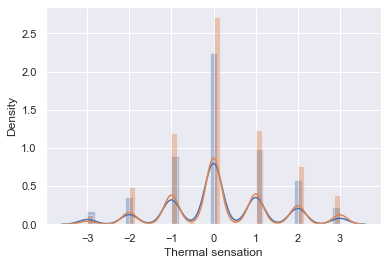

In [62]:
sns.distplot(OH_data_natural_ventilaton)
sns.distplot(OH_data_not_natural_ventilaton)

<AxesSubplot:xlabel='Air temperature (C)', ylabel='Thermal sensation'>

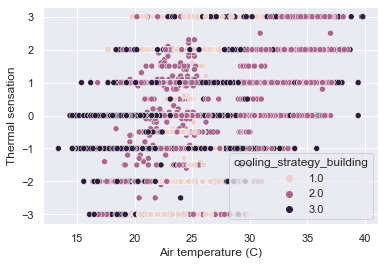

In [63]:
sns.scatterplot(x="Air temperature (C)", y="Thermal sensation", data=OH_data, hue='cooling_strategy_building')

In [64]:
OH_data[['Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter']]

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
74,0.0,0.0,1.0,0.0
75,0.0,0.0,1.0,0.0
76,0.0,0.0,1.0,0.0
77,0.0,0.0,1.0,0.0
78,0.0,0.0,1.0,0.0
...,...,...,...,...
73160,0.0,0.0,0.0,1.0
73161,0.0,0.0,0.0,1.0
73162,0.0,0.0,0.0,1.0
73163,0.0,0.0,0.0,1.0


In [65]:
OH_data_summer = OH_data[OH_data.Season_Summer == 1]
OH_data_winter = OH_data[OH_data.Season_Winter == 1]
OH_data_spring = OH_data[OH_data.Season_Spring == 1]
OH_data_autumn = OH_data[OH_data.Season_Autumn == 1]

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Thermal sensation acceptability_1.0', ylabel='Density'>

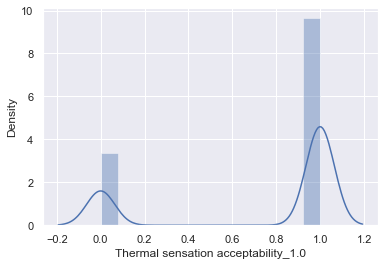

In [66]:
sns.distplot(OH_data_summer['Thermal sensation acceptability_1.0'])

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Thermal sensation acceptability_1.0', ylabel='Density'>

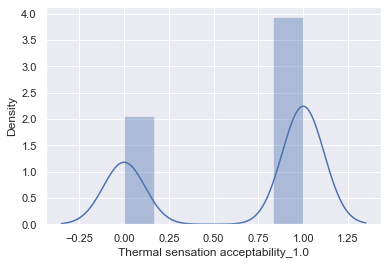

In [67]:
sns.distplot(OH_data_autumn['Thermal sensation acceptability_1.0'])

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Thermal sensation acceptability_1.0', ylabel='Density'>

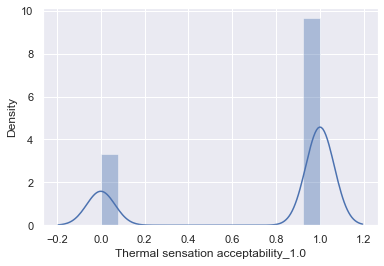

In [68]:
sns.distplot(OH_data_winter['Thermal sensation acceptability_1.0'])

c:\users\rajat\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Thermal sensation acceptability_1.0', ylabel='Density'>

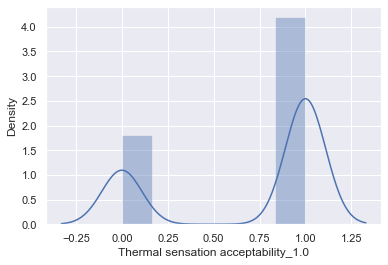

In [69]:
sns.distplot(OH_data_spring['Thermal sensation acceptability_1.0'])